# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [260]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
import json
from datetime import datetime
import PIL as PIL

# Import API key
from api_keys import weather_api_key
API_KEY=weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [261]:
## Generate Cities List

In [262]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
totcitydata=(len(cities))
if len(cities)>500:
    print("Okay to Proceed")
else:
    print("Need More City Data")


611
Okay to Proceed


In [263]:
cities

['tasiilaq',
 'butaritari',
 'kamenskoye',
 'bredasdorp',
 'caarapo',
 'rikitea',
 'naze',
 'hasaki',
 'qaanaaq',
 'ilulissat',
 'albany',
 'beringovskiy',
 'kapaa',
 'barrow',
 'irkutsk',
 'faanui',
 'bluff',
 'morros',
 'chokurdakh',
 'odweyne',
 'burns lake',
 'conde',
 'kaeo',
 'sitka',
 'mahebourg',
 'jamestown',
 'torbay',
 'bethel',
 'vaini',
 'belushya guba',
 'mataura',
 'manggar',
 'new norfolk',
 'illoqqortoormiut',
 'punta arenas',
 'roma',
 'thompson',
 'saint george',
 'barentsburg',
 'longyearbyen',
 'lavrentiya',
 'saldanha',
 'georgetown',
 'vostok',
 'maceio',
 'san cristobal',
 'hilo',
 'yellowknife',
 'two hills',
 'abong mbang',
 'cap-aux-meules',
 'saint-philippe',
 'kahului',
 'uzunovo',
 'chernyshevskiy',
 'ushuaia',
 'marcona',
 'geraldton',
 'arraial do cabo',
 'carnarvon',
 'isangel',
 'san quintin',
 'stabat',
 'nanortalik',
 'ilebo',
 'clyde river',
 'khatanga',
 'castro',
 'ancud',
 'narsaq',
 'ahipara',
 'busselton',
 'atuona',
 'cape town',
 'vestmannaey

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [264]:
url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + API_KEY
response = requests.get(f"{url}&q={city}").json() 
response

{'coord': {'lon': -69.3632, 'lat': 77.484},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 0.77,
  'feels_like': -11.45,
  'temp_min': 0.77,
  'temp_max': 0.77,
  'pressure': 1023,
  'humidity': 64,
  'sea_level': 1023,
  'grnd_level': 1019},
 'visibility': 10000,
 'wind': {'speed': 6.4, 'deg': 22, 'gust': 6.35},
 'clouds': {'all': 3},
 'dt': 1618532075,
 'sys': {'country': 'GL', 'sunrise': 1618468934, 'sunset': 1618540329},
 'timezone': -10800,
 'id': 3831208,
 'name': 'Qaanaaq',
 'cod': 200}

In [265]:
city

'qaanaaq'

In [266]:
#Json weather check for each city and print log
city_name = []
clouds = []
country = []
wind_speed = []
date = []
latitude = []
longitude = []
max_temp = []
humidity = []

counter=1
print(f"Weather Data Processing Initialization")
print(f"______________________________________")
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + API_KEY
for city in cities:
    try:
        response=requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} of {totcitydata} | {city_record}")
        counter=counter+1

# If no record found "skip" to next call
    except:
        print("City not found. Skipping this location...")
    continue

Weather Data Processing Initialization
______________________________________
Processing Record 1 of 611 | Tasiilaq
Processing Record 2 of 611 | Butaritari
City not found. Skipping this location...
Processing Record 3 of 611 | Bredasdorp
Processing Record 4 of 611 | Caarapó
Processing Record 5 of 611 | Rikitea
Processing Record 6 of 611 | Naze
Processing Record 7 of 611 | Hasaki
Processing Record 8 of 611 | Qaanaaq
Processing Record 9 of 611 | Ilulissat
Processing Record 10 of 611 | Albany
Processing Record 11 of 611 | Beringovskiy
Processing Record 12 of 611 | Kapaa
Processing Record 13 of 611 | Barrow
Processing Record 14 of 611 | Irkutsk
Processing Record 15 of 611 | Faanui
Processing Record 16 of 611 | Bluff
Processing Record 17 of 611 | Morros
Processing Record 18 of 611 | Chokurdakh
Processing Record 19 of 611 | Oodweyne
Processing Record 20 of 611 | Burns Lake
Processing Record 21 of 611 | Conde
Processing Record 22 of 611 | Kaeo
Processing Record 23 of 611 | Sitka
Processing Re

Processing Record 188 of 611 | Verkhnevilyuysk
Processing Record 189 of 611 | Deputatsky
Processing Record 190 of 611 | Northam
Processing Record 191 of 611 | Dunedin
Processing Record 192 of 611 | Donetsk
Processing Record 193 of 611 | Katsuura
Processing Record 194 of 611 | Otorohanga
Processing Record 195 of 611 | Senj
Processing Record 196 of 611 | Tiznit Province
Processing Record 197 of 611 | Alenquer
Processing Record 198 of 611 | Dikson
Processing Record 199 of 611 | Norman Wells
Processing Record 200 of 611 | San Ramon
Processing Record 201 of 611 | Severo-Kuril'sk
Processing Record 202 of 611 | Santa Rosa
Processing Record 203 of 611 | Cidreira
Processing Record 204 of 611 | Buraidah
Processing Record 205 of 611 | Barcelos
Processing Record 206 of 611 | Choctaw
City not found. Skipping this location...
Processing Record 207 of 611 | Muchkapskiy
Processing Record 208 of 611 | Salinópolis
Processing Record 209 of 611 | Mocuba
Processing Record 210 of 611 | Guánica
Processing Re

Processing Record 373 of 611 | Karratha
Processing Record 374 of 611 | Oranjemund
Processing Record 375 of 611 | Mangan
City not found. Skipping this location...
Processing Record 376 of 611 | Tonj
City not found. Skipping this location...
Processing Record 377 of 611 | Sovetskiy
City not found. Skipping this location...
Processing Record 378 of 611 | Katangli
Processing Record 379 of 611 | Aklavik
Processing Record 380 of 611 | Takahata
Processing Record 381 of 611 | Kemijärvi
Processing Record 382 of 611 | Sabla
Processing Record 383 of 611 | Kutum
Processing Record 384 of 611 | Redwater
Processing Record 385 of 611 | Tobol
Processing Record 386 of 611 | Srandakan
Processing Record 387 of 611 | Goderich
Processing Record 388 of 611 | Moose Factory
City not found. Skipping this location...
Processing Record 389 of 611 | Provatas
Processing Record 390 of 611 | Worland
Processing Record 391 of 611 | Haljala
Processing Record 392 of 611 | Xai-Xai
City not found. Skipping this location...

Processing Record 556 of 611 | Menongue
Processing Record 557 of 611 | Ous
Processing Record 558 of 611 | Tías
Processing Record 559 of 611 | Dologon


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [267]:
city_data=pd.DataFrame({"City":city_name,
                        "Cloudiness":clouds,
                        "Country":country,
                        "Date":date,
                        "Humidity":humidity,
                        "Lat":latitude,
                        "Lng":longitude,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed})
city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,90,GL,1618532081,100,65.6145,-37.6368,26.60,11.34
1,Butaritari,100,KI,1618532081,74,3.0707,172.7902,82.26,9.73
2,Bredasdorp,29,ZA,1618532082,67,-34.5322,20.0403,62.60,17.27
3,Caarapó,12,BR,1618532082,59,-22.6342,-54.8222,73.42,6.04
4,Rikitea,70,PF,1618532006,72,-23.1203,-134.9692,78.31,7.99
...,...,...,...,...,...,...,...,...,...
554,Muzhi,5,RU,1618532269,75,65.3667,64.6667,14.59,6.55
555,Menongue,98,AO,1618532269,89,-14.6585,17.6910,62.19,3.62
556,Ous,14,RU,1618532269,77,60.9058,61.5186,30.49,8.46
557,Tías,20,ES,1618532270,77,28.9611,-13.6450,66.20,11.50


In [268]:
city_data["Humidity"].max()


100

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [269]:
city_data.count()


City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [270]:
#  Get the indices of cities that have humidity over 100%.


In [271]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#convert unix timestamp to date time - pandas.pydata.org time series/date functionality
city_data["Date"]=pd.to_datetime(city_data["Date"],unit="s")
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=city_data[["City","Lat","Lng","Max Temp","Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
clean_sort=clean_city_data.sort_values(by='City',ascending=True).reset_index(drop=True)
clean_sort


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Abong Mbang,3.9833,13.1833,68.05,96,72,2.59,CM,2021-04-16 00:14:57
1,Adilcevaz,38.8039,42.7342,42.80,61,40,2.30,TR,2021-04-16 00:17:23
2,Adrar,20.5022,-10.0711,76.33,22,31,11.23,MR,2021-04-16 00:16:22
3,Agropoli,40.3469,14.9966,51.01,64,79,5.26,IT,2021-04-16 00:15:32
4,Ahipara,-35.1667,173.1667,68.58,60,0,6.87,NZ,2021-04-16 00:15:05
...,...,...,...,...,...,...,...,...,...
554,Znamenskoye,57.1281,73.8282,46.81,95,50,6.17,RU,2021-04-16 00:16:06
555,Zverinogolovskoye,54.4586,64.8542,45.86,74,72,4.83,RU,2021-04-16 00:17:38
556,Zyryanka,65.7500,150.8500,15.48,80,99,4.63,RU,2021-04-16 00:12:17
557,Örnsköldsvik,63.2909,18.7153,37.40,75,3,6.91,SE,2021-04-16 00:17:07


In [272]:
clean_sort=clean_sort.rename(columns={"Max Temp":"Max Temp ˚F"})
clean_sort
clean_sort.to_csv('output_data/cities.csv',index=True,header=True)
datadate=((clean_sort.iloc[0,8]))
chartdate=(datadate.strftime("%b %d, %Y"))

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

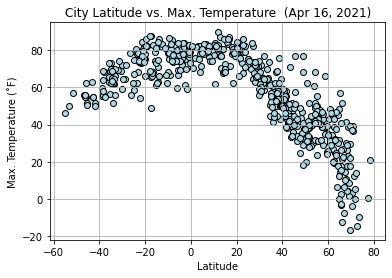

In [273]:
plt.scatter(clean_sort["Lat"],clean_sort["Max Temp ˚F"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("City Latitude vs. Max. Temperature  "+"("+chartdate+")")
plt.ylabel("Max. Temperature (˚F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/citylatvsmaxtemp.png")
plt.savefig("output_data/Fig1.png")
plt.show()


## Latitude vs. Humidity Plot

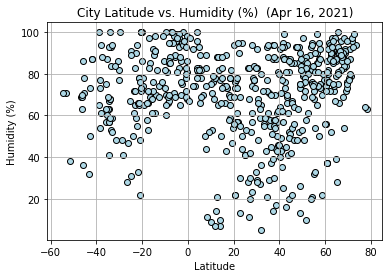

In [274]:
plt.scatter(clean_sort["Lat"],clean_sort["Humidity"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("City Latitude vs. Humidity (%)  "+"("+chartdate+")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/citylatvshumidity.png")
plt.savefig("output_data/Fig2.png")
plt.show()



## Latitude vs. Cloudiness Plot

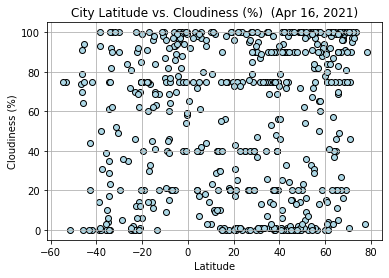

In [275]:
plt.scatter(clean_sort["Lat"],clean_sort["Cloudiness"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("City Latitude vs. Cloudiness (%)  "+"("+chartdate+")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/citylatvscloud.png")
plt.savefig("output_data/Fig3.png")
plt.show()



## Latitude vs. Wind Speed Plot

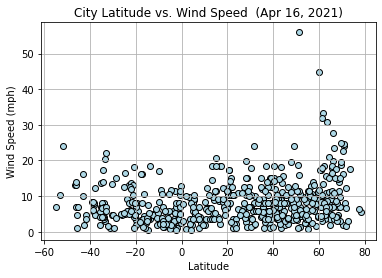

In [276]:
plt.scatter(clean_sort["Lat"],clean_sort["Wind Speed"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("City Latitude vs. Wind Speed  "+"("+chartdate+")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/citylatvsmaxtemp.png")
plt.savefig("output_data/Fig4.png")
plt.show()



## Linear Regression

In [277]:
northhem=clean_sort[clean_sort['Lat']>=0]
southhem=clean_sort[clean_sort['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7709827171210921


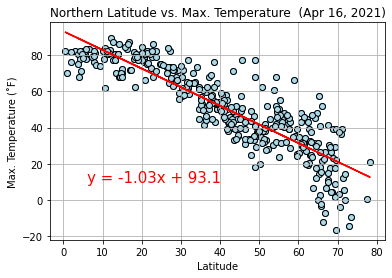

In [278]:
x_values = northhem['Lat']
y_values = northhem['Max Temp ˚F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(northhem["Lat"],northhem["Max Temp ˚F"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("Northern Latitude vs. Max. Temperature  "+"("+chartdate+")")
plt.ylabel("Max. Temperature (˚F)")
plt.xlabel("Latitude")
plt.grid()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/citynorthlatvsmaxtemp.png")
plt.savefig("output_data/Fig5.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.438189706244514


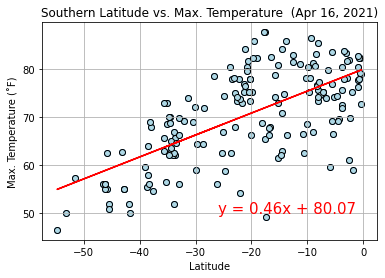

In [279]:
x_values = southhem['Lat']
y_values = southhem['Max Temp ˚F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-26,50),fontsize=15,color="red")

plt.scatter(southhem["Lat"],southhem["Max Temp ˚F"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("Southern Latitude vs. Max. Temperature  "+"("+chartdate+")")
plt.ylabel("Max. Temperature (˚F)")
plt.xlabel("Latitude")
plt.grid()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/citynorthlatvsmaxtemp.png")
plt.savefig("output_data/Fig6.png")
plt.show()




####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05427548668014208


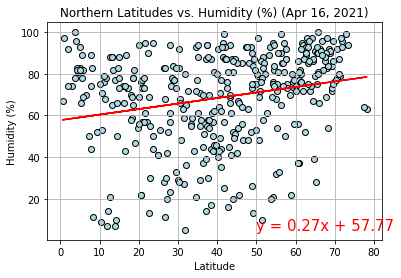

In [280]:
x_values = northhem['Lat']
y_values = northhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,5),fontsize=15,color="red")
plt.title("Northern Latitudes vs. Humidity (%) "+"("+chartdate+")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/northlatvshumidity.png")
plt.savefig("output_data/Fig7.png")
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14247667946630846


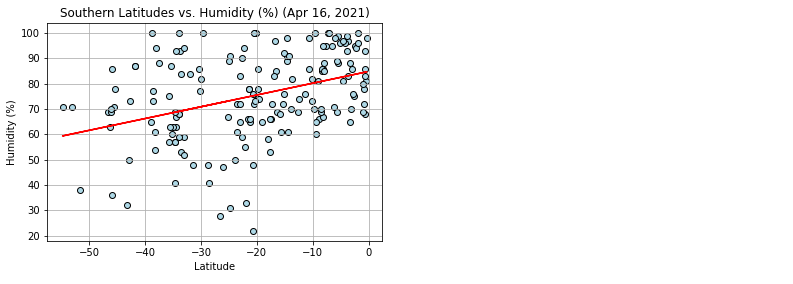

In [281]:
x_values = southhem['Lat']
y_values = southhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,5),fontsize=15,color="red")


plt.title("Southern Latitudes vs. Humidity (%) "+"("+chartdate+")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/southlatvshumidity.png")
plt.savefig("output_data/Fig8.png")
plt.show()




####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03251757715149055


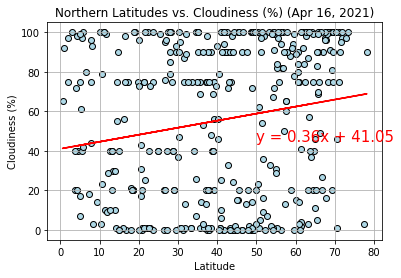

In [282]:
x_values = northhem['Lat']
y_values = northhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,45),fontsize=15,color="red")
plt.title("Northern Latitudes vs. Cloudiness (%) "+"("+chartdate+")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/northlatvscloudiness.png")
plt.savefig("output_data/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10062473846859252


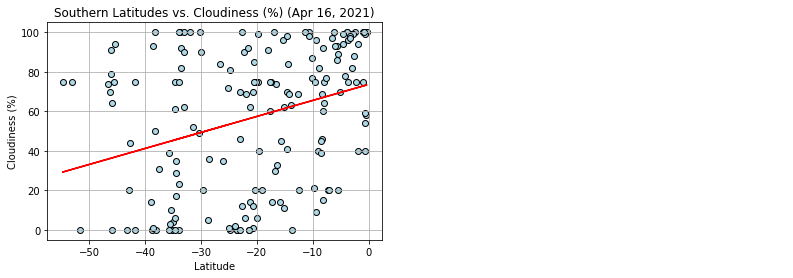

In [283]:
x_values = southhem['Lat']
y_values = southhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,45),fontsize=15,color="red")
plt.title("Southern Latitudes vs. Cloudiness (%) "+"("+chartdate+")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/southlatvscloudiness.png")
plt.savefig("output_data/Fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04447394494781017


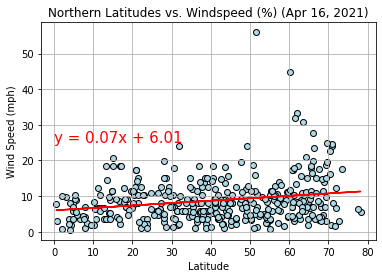

In [284]:
x_values = northhem['Lat']
y_values = northhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.title("Northern Latitudes vs. Windspeed (%) "+"("+chartdate+")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/northlatvsWindspeed.png")
plt.savefig("output_data/Fig11.png")
plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08030729897848093


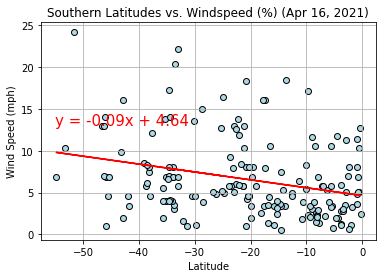

In [285]:
x_values = southhem['Lat']
y_values = southhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,13),fontsize=15,color="red")
plt.title("Southern Latitudes vs. Windspeed (%) "+"("+chartdate+")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/southlatvsWindspeed.png")
plt.savefig("output_data/Fig12.png")
plt.show()



In [286]:
#Create one single image with multiple plots

In [287]:
from PIL import Image
im1=Image.open("output_data/fig1.png")
im2=Image.open("output_data/fig2.png")
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
get_concat_h(im1, im2).save('output_data/fig13.jpg')

In [288]:
im3=Image.open("output_data/fig3.png")
im4=Image.open("output_data/fig4.png")
def get_concat_h(im3, im4):
    dst = Image.new('RGB', (im3.width + im4.width, im3.height))
    dst.paste(im3, (0, 0))
    dst.paste(im4, (im3.width, 0))
    return dst
get_concat_h(im3, im4).save('output_data/fig14.jpg')

In [298]:
im5=Image.open("output_data/fig5.png")
im6=Image.open("output_data/fig6.png")
def get_concat_h(im5, im6):
    dst = Image.new('RGB', (im5.width + im6.width, im5.height))
    dst.paste(im5, (0, 0))
    dst.paste(im6, (im5.width, 0))
    return dst
get_concat_h(im5, im6).save('output_data/fig15.jpg')

In [299]:
im7=Image.open("output_data/fig7.png")
im8=Image.open("output_data/fig8.png")
def get_concat_h(im7, im8):
    dst = Image.new('RGB', (im7.width + im8.width, im7.height))
    dst.paste(im7, (0, 0))
    dst.paste(im8, (im7.width, 0))
    return dst
get_concat_h(im7, im8).save('output_data/fig16.jpg')

In [300]:
im9=Image.open("output_data/fig9.png")
im10=Image.open("output_data/fig10.png")
def get_concat_h(im9, im10):
    dst = Image.new('RGB', (im9.width + im10.width, im9.height))
    dst.paste(im9, (0, 0))
    dst.paste(im10, (im9.width, 0))
    return dst
get_concat_h(im9, im10).save('output_data/fig17.jpg')

In [301]:
im11=Image.open("output_data/fig11.png")
im12=Image.open("output_data/fig12.png")
def get_concat_h(im11, im12):
    dst = Image.new('RGB', (im11.width + im12.width, im11.height))
    dst.paste(im11, (0, 0))
    dst.paste(im12, (im11.width, 0))
    return dst
get_concat_h(im11, im12).save('output_data/fig18.jpg')

In [302]:
im13=Image.open("output_data/fig13.jpg")
im14=Image.open("output_data/fig14.jpg")
def get_concat_h(im13, im14):
    dst = Image.new('RGB', (im13.width + im14.width, im13.height))
    dst.paste(im13, (0, 0))
    dst.paste(im14, (im13.width, 0))
    return dst
get_concat_h(im13, im14).save('output_data/fig19.jpg')

In [303]:
im15=Image.open("output_data/fig15.jpg")
im16=Image.open("output_data/fig16.jpg")
def get_concat_h(im15, im16):
    dst = Image.new('RGB', (im15.width + im16.width, im15.height))
    dst.paste(im15, (0, 0))
    dst.paste(im16, (im15.width, 0))
    return dst
get_concat_h(im15, im16).save('output_data/fig20.jpg')

In [304]:
im17=Image.open("output_data/fig17.jpg")
im18=Image.open("output_data/fig18.jpg")
def get_concat_h(im17, im18):
    dst = Image.new('RGB', (im17.width + im18.width, im17.height))
    dst.paste(im17, (0, 0))
    dst.paste(im18, (im17.width, 0))
    return dst
get_concat_h(im17, im18).save('output_data/fig21.jpg')

In [305]:
im19=Image.open("output_data/fig19.jpg")
im20=Image.open("output_data/fig20.jpg")
def get_concat_v(im19, im20):
    dst = Image.new('RGB', (im19.width, im19.height + im20.height))
    dst.paste(im19, (0, 0))
    dst.paste(im20, (0, im19.height))
    return dst

get_concat_v(im19, im20).save('output_data/fig22.jpg')

In [306]:
im21=Image.open("output_data/fig21.jpg")
im22=Image.open("output_data/fig22.jpg")
def get_concat_v(im22, im21):
    dst = Image.new('RGB', (im22.width, im22.height + im21.height))
    dst.paste(im22, (0, 0))
    dst.paste(im21, (0, im22.height))
    return dst

get_concat_v(im22, im21).save('output_data/fig23.jpg')